In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Objective
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

* It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

* It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

 

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

 

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

 

You can take the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

 

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

 

Finally, recommend strategies to manage customer churn based on your observations.


https://learn.upgrad.com/v/course/329/session/59147/segment/328679

### Hints to work with
1. Use first two months as good phase, next one month as action phase and forth month as churn phase
    1. Identify high value customers  - good and action phase
    2. Define churn - churn phase

In [2]:
master_df = pd.read_csv('data/telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data Understanding and Cleanup

In [3]:
master_df.shape

(99999, 226)

In [4]:
master_df['mobile_number'].nunique()

99999

In [5]:
drop_cols = ['mobile_number']

In [6]:
cols = list(master_df.columns)

for i in range(len(cols)//5):
    start_index = i*5
    print(cols[start_index:start_index+5])

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6']
['arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7']
['onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
['offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9']
['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6']
['loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7']
['loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']
['loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9']
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6']
['std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7']
['std

In [7]:
master_df['circle_id'].nunique()

1

In [8]:
drop_cols.append('circle_id')

All customers belong to same circle - not useful.

In [9]:
master_df[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
loc_og_t2o_mou    98981 non-null float64
std_og_t2o_mou    98981 non-null float64
loc_ic_t2o_mou    98981 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


In [10]:
master_df[['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,98981.0,98981.0,98981.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [11]:
drop_cols.extend(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'])

No info in these columns.

In [12]:
revenue_cols = [ 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9']

master_df[revenue_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
arpu_6    99999 non-null float64
arpu_7    99999 non-null float64
arpu_8    99999 non-null float64
arpu_9    99999 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [13]:
master_df[revenue_cols].describe()

,arpu_6,arpu_7,arpu_8,arpu_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069
std,328.439770,338.156291,344.474791,341.998630
min,-2258.709000,-2014.045000,-945.808000,-1899.505000
25%,93.411500,86.980500,84.126000,62.685000
50%,197.704000,191.640000,192.080000,176.849000
75%,371.060000,365.344500,369.370500,353.466500
max,27731.088000,35145.834000,33543.624000,38805.617000


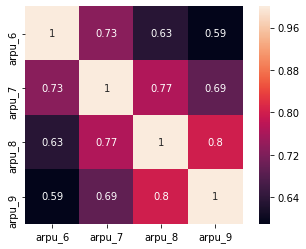

In [14]:
sns.heatmap(master_df[revenue_cols].corr(), square=True, annot=True)
plt.show()

There is a strong correlation between revenue in 8th month and 9th month. Anyhow, revenue from first 2 months is relevant as the next two months are post information. And we could merge revenue from first two months.

In [15]:
cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']
master_df[cols].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327
std,297.207406,308.794148,308.951589,308.477668
min,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000
50%,34.310000,32.330000,32.360000,29.840000
75%,118.740000,115.595000,115.860000,112.130000
max,7376.710000,8157.780000,10752.560000,10427.460000


In [16]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [17]:
# get all cols where min and max are same
same_val_cols = []
for c in master_df.columns:
    try:
        if master_df[c].min() == master_df[c].max():
            same_val_cols.append(c)
    except:
        pass
print(same_val_cols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [18]:
# drop all same valued columns as they dont offer any info
drop_cols.extend(same_val_cols)

#### Filter High Value customers

In [19]:
master_df[['mobile_number', 'total_rech_num_6', 'total_rech_amt_6']].head()

,mobile_number,total_rech_num_6,total_rech_amt_6
0,7000842753,4,362
1,7001865778,4,74
2,7001625959,5,168
3,7001204172,10,230
4,7000142493,5,196


In [20]:
master_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].describe(percentiles=[0.25, 0.5, 0.7, 0.9])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122
std,398.019701,408.114237,416.540455
min,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000
50%,230.000000,220.000000,225.000000
70%,378.000000,370.000000,380.000000
90%,732.000000,731.000000,736.000000
max,35190.000000,40335.000000,45320.000000


In [21]:
avg_amount = ((master_df['total_rech_amt_6'] + master_df['total_rech_amt_7']) / 2).quantile(0.7)
total_customers = master_df.shape[0]
master_df = master_df[((master_df['total_rech_amt_6'] + master_df['total_rech_amt_7'])/2 >
                              avg_amount)]
print(f"high value customers [{master_df.shape[0]}] [{round(master_df.shape[0]/total_customers * 100, 2)}%]")

high value customers [29979] [29.98%]


#### Tag churners

In [22]:
tag_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
master_df[tag_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29979.000000,29979.000000,29979.000000,29979.000000
mean,277.553243,563.027651,62.249265,271.706499
std,356.582690,654.435594,244.535687,896.405238
min,0.000000,0.000000,0.000000,0.000000
25%,63.620000,136.510000,0.000000,0.000000
50%,176.230000,383.340000,0.000000,0.000000
75%,360.695000,757.620000,6.335000,0.000000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [23]:
master_df['churn'] = master_df[tag_cols].sum(axis='columns') == 0

master_df['churn'].map({True: 1, False: 0})

master_df['churn'].sum()

2589

In [24]:
master_df.drop(columns=tag_cols, inplace=True)

In [25]:
master_df.shape

(29979, 223)

In [26]:
drop_month_9_cols = [c for c in master_df.columns if '_9' in c]
drop_month_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [27]:
drop_cols.extend(drop_month_9_cols)

In [28]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [29]:
drop_cols.extend([c for c in master_df.columns if 'date' in c])

#### Preprocessing

In [30]:
print(f'Before: {master_df.shape}')
master_df = master_df.drop(columns=drop_cols)
print(f'After: {master_df.shape}')

Before: (29979, 223)
After: (29979, 153)


Missing values:

In [31]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 153 entries, arpu_6 to churn
dtypes: bool(1), float64(127), int64(25)
memory usage: 35.0 MB


In [32]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

In [33]:
# look at columns where percentage of missing values is greater than 30%
def percentage(x):
    return round(x * 100, 2)

def get_missing_value_df():
    missing_values = pd.DataFrame()
    missing_cols = []
    missing_pers = []
    for c in master_df.columns:
        missing_percentage = percentage(master_df[c].isnull().sum() / master_df.shape[0])
        if missing_percentage > 0:
            missing_cols.append(c)
            missing_pers.append(missing_percentage)
    missing_values['col'] = missing_cols
    missing_values['per'] = missing_pers
    missing_values.columns=missing_values.columns.str.strip()
    missing_values.sort_values('per', ascending=False, inplace=True)
    return missing_values

In [34]:
missing_values = get_missing_value_df()
print(missing_values[missing_values['per'] >= 30])
drop_missing_cols = missing_values[missing_values['per'] >= 30]['col']

                    col    per
99            arpu_2g_6  62.02
81    total_rech_data_6  62.02
105           fb_user_6  62.02
96            arpu_3g_6  62.02
90      count_rech_3g_6  62.02
84      max_rech_data_6  62.02
102    night_pck_user_6  62.02
87      count_rech_2g_6  62.02
93   av_rech_amt_data_6  62.02
88      count_rech_2g_7  61.13
91      count_rech_3g_7  61.13
97            arpu_3g_7  61.13
94   av_rech_amt_data_7  61.13
100           arpu_2g_7  61.13
85      max_rech_data_7  61.13
103    night_pck_user_7  61.13
82    total_rech_data_7  61.13
106           fb_user_7  61.13
89      count_rech_2g_8  60.84
83    total_rech_data_8  60.84
92      count_rech_3g_8  60.84
86      max_rech_data_8  60.84
107           fb_user_8  60.84
95   av_rech_amt_data_8  60.84
104    night_pck_user_8  60.84
98            arpu_3g_8  60.84
101           arpu_2g_8  60.84


In [35]:
master_df = master_df.drop(columns=drop_missing_cols)
master_df.shape

(29979, 126)

Fill all number cols in month 8 with 0, meaning the customer has stopped using the services.

In [36]:
missing_values = get_missing_value_df()
month_8_cols = [c for c in missing_values['col'] if '_8' in c]

for c in month_8_cols:
    print(f'{c} {master_df.dtypes[c]}')

ic_others_8 float64
loc_og_t2m_mou_8 float64
std_og_mou_8 float64
spl_og_mou_8 float64
std_og_t2f_mou_8 float64
og_others_8 float64
std_og_t2m_mou_8 float64
loc_ic_t2t_mou_8 float64
std_og_t2t_mou_8 float64
loc_ic_t2m_mou_8 float64
loc_og_mou_8 float64
loc_ic_t2f_mou_8 float64
loc_og_t2c_mou_8 float64
loc_ic_mou_8 float64
isd_og_mou_8 float64
std_ic_t2t_mou_8 float64
loc_og_t2f_mou_8 float64
std_ic_t2m_mou_8 float64
spl_ic_mou_8 float64
onnet_mou_8 float64
loc_og_t2t_mou_8 float64
std_ic_t2f_mou_8 float64
isd_ic_mou_8 float64
roam_og_mou_8 float64
std_ic_mou_8 float64
offnet_mou_8 float64
roam_ic_mou_8 float64


In [37]:
master_df[month_8_cols] = master_df[month_8_cols].fillna(0)

In [38]:
missing_values = get_missing_value_df()
# get all float types and impute them with their mean
float_cols = [c for c in missing_values['col'] if master_df.dtypes[c] == np.float64]
float_cols

['onnet_mou_6',
 'loc_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_mou_6',
 'og_others_6',
 'spl_og_mou_6',
 'std_ic_t2t_mou_6',
 'isd_og_mou_6',
 'std_og_mou_6',
 'std_ic_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_og_t2t_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'std_ic_mou_6',
 'loc_og_t2f_mou_6',
 'spl_ic_mou_6',
 'offnet_mou_6',
 'loc_og_t2m_mou_6',
 'ic_others_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'isd_ic_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'isd_ic_mou_7',
 'spl_ic_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_mou_7',
 'std_ic_t2f_mou_7',
 'isd_og_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2t_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'onnet_mou_7',
 'spl_og_mou_7',
 'og_others_

In [39]:
for c in float_cols:
    mean_val = master_df[c].mean()
    master_df[c] = master_df[c].fillna(mean_val)

In [40]:
missing_values = get_missing_value_df()
missing_values

,col,per


In [41]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 126 entries, arpu_6 to churn
dtypes: bool(1), float64(100), int64(25)
memory usage: 28.8 MB


In [42]:
master_df['churn'] = master_df['churn'].astype('int32')

In [43]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 126 entries, arpu_6 to churn
dtypes: float64(100), int32(1), int64(25)
memory usage: 28.9 MB


At this point all the columns are numerical and no missing values.

In [44]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

### Modelling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE

In [46]:
X = master_df.drop(columns=['churn'])
y = master_df['churn']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(23983, 125)
(5996, 125)


#### Handle class imbalance

In [48]:
y_train.value_counts()

0    21906
1     2077
Name: churn, dtype: int64

In [49]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [50]:
y_train.value_counts()

1    21906
0    21906
Name: churn, dtype: int64

In [51]:
# we want to identify churners correctly
scoring = 'recall'

#### Model 1: Logistic Regression

In [52]:
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))]
pipeline = Pipeline(steps=steps)

params = {'lr__C': [0.0001, 0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(pipeline,
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.8759242719719014
Best params = {'lr__C': 1}


#### Model 2: Logistic Regression with PCA

In [53]:
# steps = [('scaler', StandardScaler()), ('PCA', PCA()), ('lr', LogisticRegression(max_iter=1000))]
# pipeline = Pipeline(steps=steps)

# params = {'PCA__n_components': np.arange(10, X_train.shape[1], 10),
#           'lr__C': [0.0001, 0.001, 0.01, 0.1, 1]}

# grid = GridSearchCV(pipeline,
#                     param_grid=params,
#                     scoring='accuracy',
#                     cv=5)

# grid.fit(X_train, y_train)

# print(f"Best score = {grid.best_score_}")
# print(f"Best params = {grid.best_params_}")

#### Model 3: Linear SVC with PCA

In [54]:
# steps = [('scaler', StandardScaler()), ('PCA', PCA()), ('lr', LinearSVC())]
# pipeline = Pipeline(steps=steps)

# params = {'PCA__n_components': np.arange(10, X_train.shape[1], 10)}

# grid = GridSearchCV(pipeline,
#                     param_grid=params,
#                     scoring='accuracy',
#                     cv=5)

# grid.fit(X_train, y_train)

# print(f"Best score = {grid.best_score_}")
# print(f"Best params = {grid.best_params_}")

#### Model 4: Adaboost

In [55]:
# from sklearn.ensemble import AdaBoostClassifier
# estimators = list(range(1, 50, 3))
# shallow_tree = DecisionTreeClassifier(max_depth=8,
#                                       min_samples_leaf=550)
# abc_scores = []
# for n_est in estimators:
#     ABC = AdaBoostClassifier(
#     base_estimator=shallow_tree, 
#     n_estimators = n_est)
    
#     ABC.fit(X_train, y_train)
#     y_pred = ABC.predict(X_test)
#     score = accuracy_score(y_test, y_pred)
#     abc_scores.append(score)

# print(abc_scores)

# print(f'Best estimator count: {list(range(1, 50, 3))[abc_scores.index(max(abc_scores))]}')